<a href="https://colab.research.google.com/github/Anurag-ghosh-12/Cats_Vs_Dogs_Classification/blob/main/Cat_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dog vs Cats Image Classification**
Author : **Anurag Ghosh**

## Downloading Dataset from Kaggle

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [3]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

##Importing Required Libraries

In [4]:
!pip3 install tensorflow numpy matplotlib keras opencv-python

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [6]:
# How does some code snippets of os library works?
list_cats = ['/content/dogs_vs_cats/train/cats/cat.0.jpg', '/content/dogs_vs_cats/train/cats/cat.1.jpg']
#creating such a list manually is impossible as dataset contains 1000 of data, therefore we apply a method lisdir
#enlists all the images under respective directory
os.listdir('/content/dogs_vs_cats/train/dogs')


['dog.7960.jpg',
 'dog.12379.jpg',
 'dog.506.jpg',
 'dog.8667.jpg',
 'dog.3802.jpg',
 'dog.9621.jpg',
 'dog.8703.jpg',
 'dog.6094.jpg',
 'dog.11105.jpg',
 'dog.832.jpg',
 'dog.403.jpg',
 'dog.7111.jpg',
 'dog.1866.jpg',
 'dog.8994.jpg',
 'dog.4690.jpg',
 'dog.11983.jpg',
 'dog.9652.jpg',
 'dog.4549.jpg',
 'dog.10085.jpg',
 'dog.8225.jpg',
 'dog.1230.jpg',
 'dog.4247.jpg',
 'dog.6557.jpg',
 'dog.6753.jpg',
 'dog.3208.jpg',
 'dog.1557.jpg',
 'dog.11231.jpg',
 'dog.8187.jpg',
 'dog.5150.jpg',
 'dog.6531.jpg',
 'dog.3103.jpg',
 'dog.2445.jpg',
 'dog.11763.jpg',
 'dog.7186.jpg',
 'dog.2394.jpg',
 'dog.9862.jpg',
 'dog.3393.jpg',
 'dog.4914.jpg',
 'dog.11968.jpg',
 'dog.10794.jpg',
 'dog.9960.jpg',
 'dog.6373.jpg',
 'dog.1360.jpg',
 'dog.2696.jpg',
 'dog.11392.jpg',
 'dog.2852.jpg',
 'dog.6276.jpg',
 'dog.7481.jpg',
 'dog.3634.jpg',
 'dog.9224.jpg',
 'dog.6022.jpg',
 'dog.7379.jpg',
 'dog.5326.jpg',
 'dog.11864.jpg',
 'dog.2528.jpg',
 'dog.3187.jpg',
 'dog.2558.jpg',
 'dog.1785.jpg',
 'dog.7

In [7]:
#randomly picks 5 sample images from the list
random.sample(os.listdir('/content/dogs_vs_cats/train/dogs'), 5)
#/content/dogs_vs_cats/train/cats/cat.0.jpg
os.path.join("/content/dogs_vs_cats/train/cats/", 'cat.0.jpg')#joins two paths

'/content/dogs_vs_cats/train/cats/cat.0.jpg'

## Data Visualisation

In [8]:
def plot_images_from_directory(directory_path, animal_class, num_images_to_show=6):
    image_files = os.listdir(directory_path)

    # Show randomly 'num_images_to_show' images from the current list/directory
    # If there are fewer images than requested, show them all
    if len(image_files) < num_images_to_show:
        print(f"Found only {len(image_files)} images in {directory_path}, hence showing all.")
        num_images_to_show = len(image_files)

    selected_images = random.sample(image_files, num_images_to_show)

    # Plotting the images
    fig, axes = plt.subplots(2, 3, figsize=(8, 8))
    axes = axes.ravel()

    for idx, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[idx].imshow(image)
        axes[idx].set_title(f"Image: {animal_class}")
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

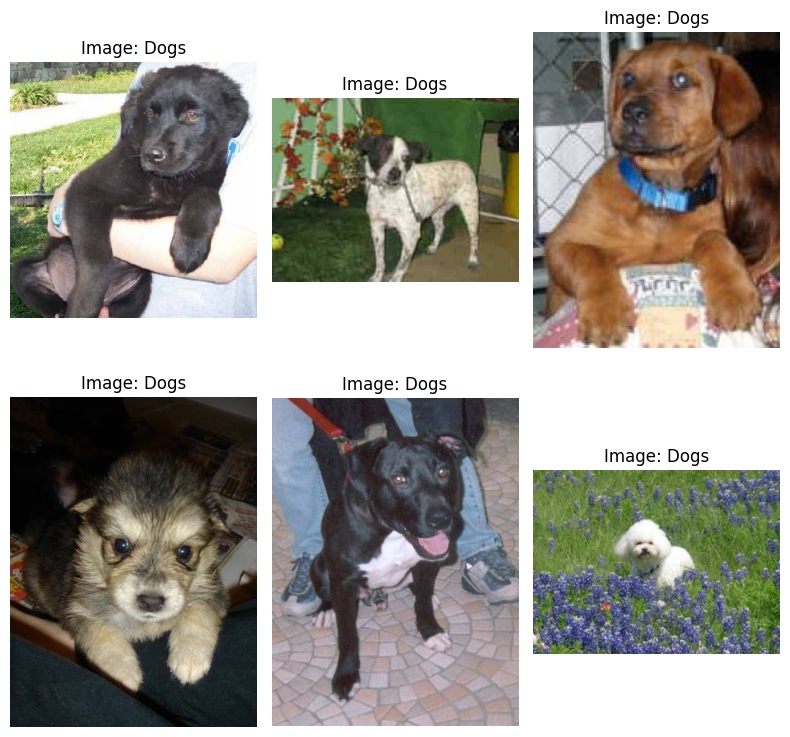

In [9]:
dog_directory_path = '/content/dogs_vs_cats/train/dogs'
plot_images_from_directory(dog_directory_path, 'Dogs')

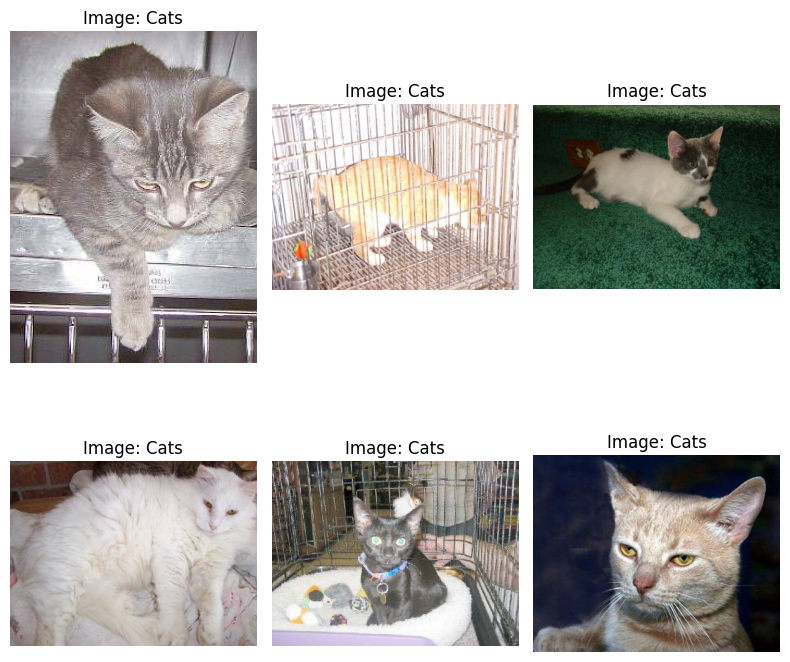

In [10]:
cat_directory_path = '/content/dogs_vs_cats/train/cats'
plot_images_from_directory(cat_directory_path,'Cats')

## Data Analysis

In [11]:
# Counting how many images are there under each class.
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animal = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(f"{classes_animal[0]} has {count[0]} images,\n{classes_animal[1]} has {count[1]} images. ")

Cats has 10000 images,
Dogs has 10000 images. 


Text(0.5, 1.0, 'Count of Cat and Dog Images')

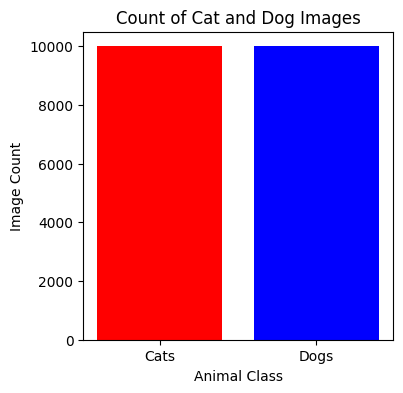

In [12]:
#plotting bar plot to check distribution of images in different classes
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.bar(classes_animal, count, color=['red', 'blue'])
ax.set_xlabel('Animal Class')
ax.set_ylabel('Image Count')
ax.set_title('Count of Cat and Dog Images')

## Removing corrupted images (if any)

In [13]:
import os
import cv2
import imghdr

# List of acceptable image extensions
allowed_image_exts = ['jpeg', 'jpg', 'png']
dataset_directory = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for directory_path, subdirectories, filenames in os.walk(dataset_directory):
    for filename in filenames:
        file_path = os.path.join(directory_path, filename)

        try:
            file_extension = imghdr.what(file_path)
            # If the file extension is not in the allowed list, remove it
            if file_extension not in allowed_image_exts:
                print(f'Image not in allowed extensions list: {file_path}')
                os.remove(file_path)
            else:
                image = cv2.imread(file_path)

        except Exception as error:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {error}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)


## Building the model
### Splitting into Training and Validation Data

In [14]:
base_dir = '/content/dogs_vs_cats/train'
#Standardization of data 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [15]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,  #at a time 20 images
    class_mode='binary',  # Binary Classification so binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

    # total 20000 images -> 20% will be 4000 images(validation set), 16000 for training set

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [16]:
# Class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


### The CNN model

In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

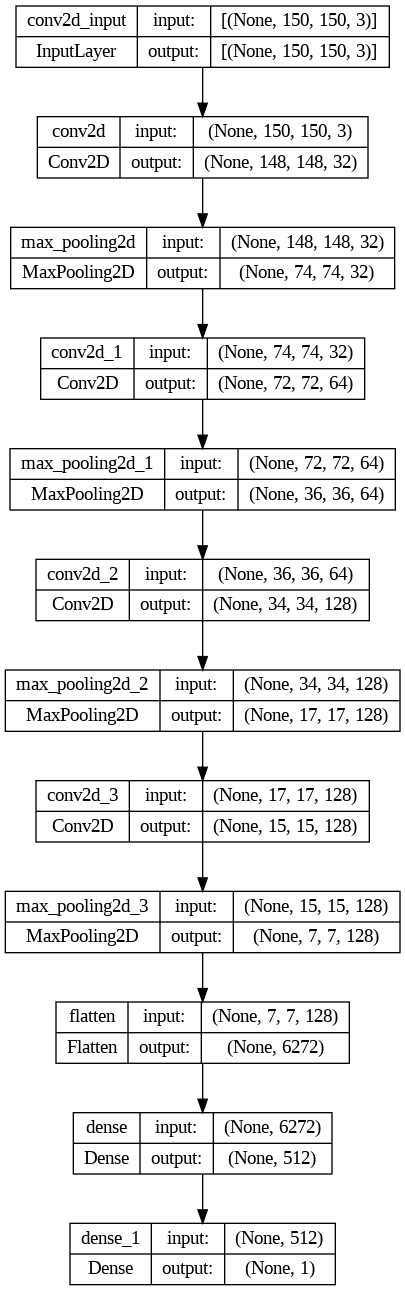

In [18]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

800.0 200.0
Epoch 1/10
800/800 [==============================] - 41s 42ms/step - loss: 0.6865 - accuracy: 0.5447 - val_loss: 0.6758 - val_accuracy: 0.5965
Epoch 2/10
800/800 [==============================] - 36s 45ms/step - loss: 0.6017 - accuracy: 0.6636 - val_loss: 0.5444 - val_accuracy: 0.7113
Epoch 3/10
800/800 [==============================] - 35s 44ms/step - loss: 0.4903 - accuracy: 0.7567 - val_loss: 0.4471 - val_accuracy: 0.7870
Epoch 4/10
800/800 [==============================] - 35s 43ms/step - loss: 0.4143 - accuracy: 0.8065 - val_loss: 0.4335 - val_accuracy: 0.8020
Epoch 5/10
800/800 [==============================] - 34s 42ms/step - loss: 0.3508 - accuracy: 0.8443 - val_loss: 0.3969 - val_accuracy: 0.8220
Epoch 6/10
800/800 [==============================] - 38s 47ms/step - loss: 0.2845 - accuracy: 0.8754 - val_loss: 0.3963 - val_accuracy: 0.8395
Epoch 7/10
800/800 [==============================] - 38s 47ms/step - loss: 0.2238 - accuracy: 0.9082 - val_loss: 0.3864 - v

In [20]:
history.history

{'loss': [0.6865163445472717,
  0.6017271876335144,
  0.49030864238739014,
  0.414328008890152,
  0.3507603704929352,
  0.284488707780838,
  0.2237553894519806,
  0.16651169955730438,
  0.11079917103052139,
  0.08085885643959045],
 'accuracy': [0.5446875095367432,
  0.6636250019073486,
  0.7567499876022339,
  0.8065000176429749,
  0.8443124890327454,
  0.8754374980926514,
  0.9082499742507935,
  0.9335625171661377,
  0.9568750262260437,
  0.9698749780654907],
 'val_loss': [0.6757784485816956,
  0.5443630218505859,
  0.4471220076084137,
  0.4335319697856903,
  0.39694085717201233,
  0.39626213908195496,
  0.3864498436450958,
  0.49332690238952637,
  0.520744264125824,
  0.7501590847969055],
 'val_accuracy': [0.5964999794960022,
  0.7112500071525574,
  0.7870000004768372,
  0.8019999861717224,
  0.8220000267028809,
  0.8395000100135803,
  0.8504999876022339,
  0.8462499976158142,
  0.840749979019165,
  0.8410000205039978]}

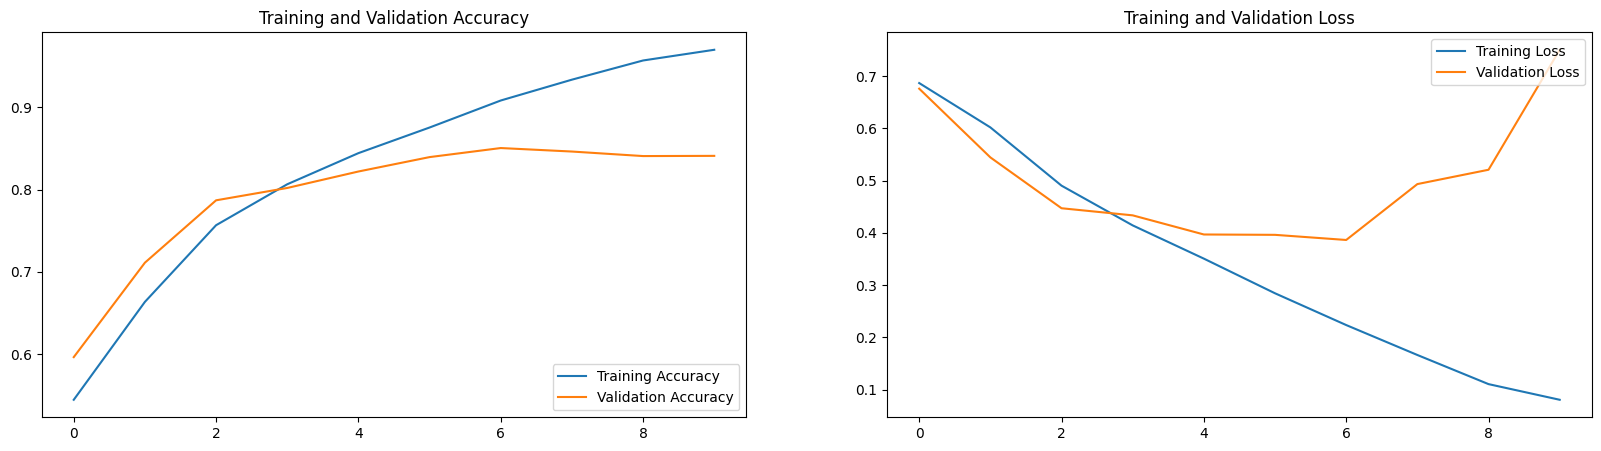

In [23]:
# plotting training accuracy metrics vs validation accuracy metrics

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# it is clear from the plot that our model is not learning much after epoch 4, it is overfitting after epoch 3
# we can stop after epoch 4 only

In [24]:

#  Epoch 4/10
#  800/800 [==============================] - 35s 43ms/step - loss: 0.4143 - accuracy: 0.8065 - val_loss: 0.4335 - val_accuracy: 0.8020
#  Epoch 5/10
# 800/800 [==============================] - 34s 42ms/step - loss: 0.3508 - accuracy: 0.8443 - val_loss: 0.3969 - val_accuracy: 0.8220
#  see how it changes after epoch 4- starts to overfit


## Model Evaluation on Test Data

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False)

Found 5000 images belonging to 2 classes.


In [27]:
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
#note that I have used sigmoid as activation in the final layer
# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()

class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 8s 34ms/step


array([0, 0, 0, ..., 1, 0, 1])

## Confusion Matrix

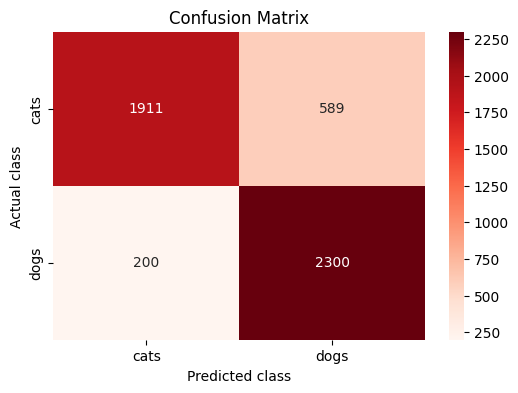

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [33]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 9s 34ms/step - loss: 0.7108 - accuracy: 0.8422
Test accuracy: 84.22%
Test loss: 0.71


## Image Prediction function for User

In [34]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 1s 513ms/step
Prediction: [[0.22689682]]


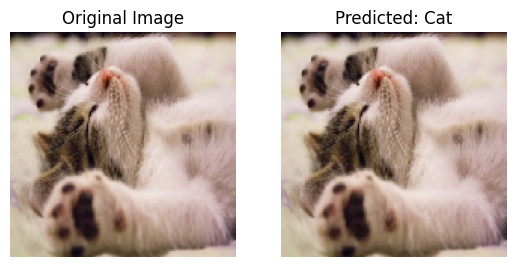

In [35]:
img_path = '/content/kitten.png'
make_prediction(img_path)

1/1 [==============================] - 0s 153ms/step
Prediction: [[0.9999976]]


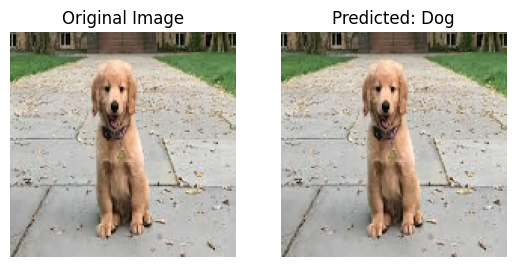

In [36]:
img_path = '/content/images.jpeg'
make_prediction(img_path)